In [ ]:
import os

file_path = 'powerconsumption.csv'
# The code below minimizes the amount of downloads when you rerun all cells.
# You probably don't need to download the same file over and over again...
if os.path.isfile(file_path):
    print('File already exists! Delete the file to force download again...')
else:
    !wget -O powerconsumption.zip 'https://docs.google.com/uc?export=download&id=1C1FPRDQsa64k5voWHl4dmR1K7B3wf1Vq&confirm=t'
    !unzip powerconsumption.zip


--2024-02-26 03:02:46--  https://docs.google.com/uc?export=download&id=1C1FPRDQsa64k5voWHl4dmR1K7B3wf1Vq&confirm=t
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.113, 142.251.2.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1C1FPRDQsa64k5voWHl4dmR1K7B3wf1Vq&export=download [following]
--2024-02-26 03:02:47--  https://drive.usercontent.google.com/download?id=1C1FPRDQsa64k5voWHl4dmR1K7B3wf1Vq&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1427424 (1.4M) [application/octet-stream]
Saving to: ‘powerconsumption.zip’

powerconsumption.zi 100%[===================>]   1.36M  --.

## Initial Data Preparation

For this task, I have focused on preparing the dataset for time series analysis. The dataset contains multiple columns related to electricity consumption and environmental factors in Tetouan.


1. **Load the Dataset**: Import the dataset using pandas. Removed the columns related to Power Consumption in zones other than Zone 1.

2. **Rename target column**: Simplify column name for easier access, renamed PowerConsumption_Zone1 to PowerConsumption.

3. **Datetime Conversion and Indexing**: Convert the 'Datetime' column to datetime objects and set it as the index of the DataFrame. It will enable us to use dates when slicing.

4. **Resampling**: Aggregate the data on an hourly basis. For environmental factors like temperature and humidity, calculate the mean, and for power consumption, calculate the total consumption per hour. 

Goal is to create a clean, hourly aggregated DataFrame ready for further analysis.

In [ ]:
import pandas as pd
data = pd.read_csv('powerconsumption.csv')

In [ ]:
# Convert 'Datetime' column to datetime objects
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Set 'Datetime' column as the index of the DataFrame
data.set_index('Datetime', inplace=True)

# Drop the columns for Power Consumption in zones other than Zone 1
data.drop(columns=['PowerConsumption_Zone2', 'PowerConsumption_Zone3'], inplace=True)

# Rename 'PowerConsumption_Zone1' to 'PowerConsumption'
data.rename(columns={"PowerConsumption_Zone1": "PowerConsumption"}, inplace=True)

# Resampling the data on an hourly basis
# For environmental factors like temperature and humidity, calculate the mean
# For power consumption, calculate the total consumption per hour
resampled_data = data.resample('H').agg({
    'Temperature': 'mean',
    'Humidity': 'mean',
    'WindSpeed': 'mean',
    'GeneralDiffuseFlows': 'mean',
    'DiffuseFlows': 'mean',
    'PowerConsumption': 'sum'
})

# Display the first few rows of the resampled data
resampled_data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,175187.84810
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,147943.29114
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,132498.22784
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,124866.83544
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,122855.69620


## Task 2: Visualizing Power Consumption with Rolling Statistics

Explored the power consumption data more visually, applying rolling statistics to smooth out short-term fluctuations and highlight longer-term trends and patterns. Additionally, compared these trends to environmental conditions, specifically temperature, to see if there's a visible relationship between the two.

1. **Apply Rolling Statistics**: Calculate the rolling mean and standard deviation of power consumption over a 24-hour window to smooth out the data, centering the window for a balanced view.

2. **Temperature Trend**: Similarly, calculate the rolling mean of temperature to observe its trend alongside power consumption.

3. **Create a Plot**: Generate a plot that displays the 24-hour rolling mean of power consumption and its variability, using standard deviation as a shaded area. Overlay this with the temperature trend on a secondary axis.

4. **Customization**: Customized plot with appropriate labels, a legend, and adjusted the layout for clarity.

This visualization helped in understanding daily patterns and fluctuations in power consumption and its relationship with temperature variations.



In [ ]:
import matplotlib as plt

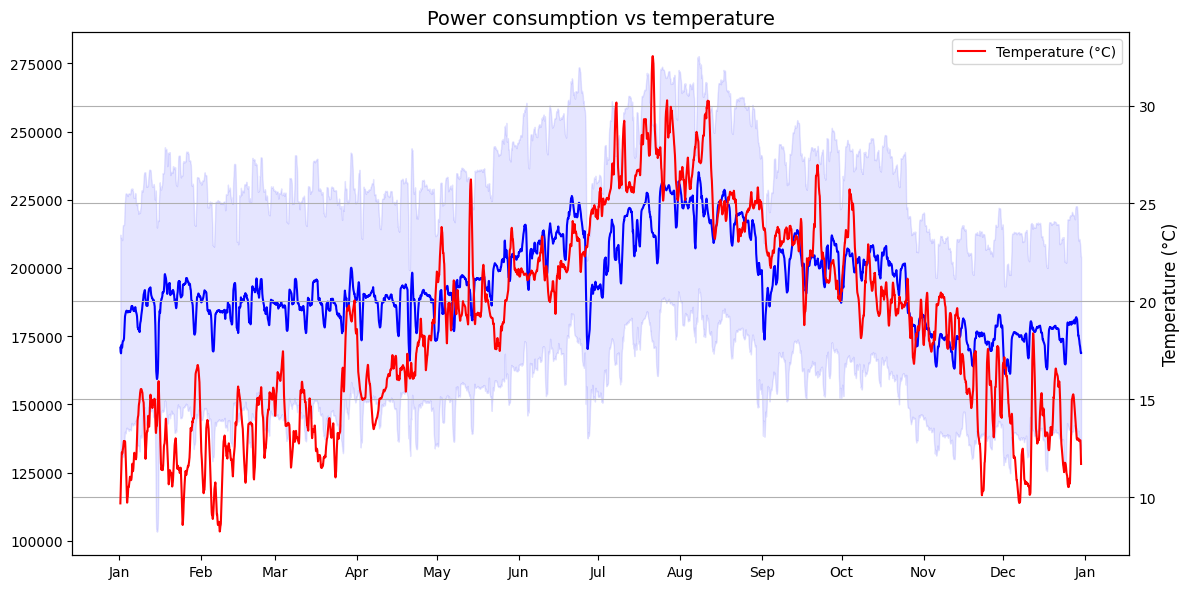

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

rolling_mean_power = resampled_data['PowerConsumption'].rolling(window=24, center=True).mean()
rolling_std_power = resampled_data['PowerConsumption'].rolling(window=24, center=True).std()

# Calculate the 24-hour rolling mean for temperature
rolling_mean_temp = resampled_data['Temperature'].rolling(window=24, center=True).mean()

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting the rolling mean of power consumption with a solid line
plt.plot(rolling_mean_power.index, rolling_mean_power, label='Power Consumption (MWh)', color='blue', linestyle='-')

# Adding the rolling standard deviation as a shaded area
plt.fill_between(rolling_mean_power.index, rolling_mean_power - rolling_std_power,
                 rolling_mean_power + rolling_std_power, color='blue', alpha=0.1)

# Adding the temperature trend on a secondary axis with a solid line
ax2 = plt.gca().twinx()
ax2.plot(rolling_mean_temp.index, rolling_mean_temp, label='Temperature (°C)', color='red', linestyle='-')

# Customization to match the provided image
plt.title('Power consumption vs temperature', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Power Consumption (MWh)', fontsize=12)
ax2.set_ylabel('Temperature (°C)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Set the x-axis to show the month labels as in the provided image
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='y', which='major', labelsize=10)

# Show plot
plt.show()

## Task 3: Baseline Model Training
In this task I prepared dataaset and then trained and evaluated a simple model.
### Prepare Dataset

First , prepared the dataset for modeling by creating training and test splits. This involves not only segmenting the data into separate sets but also shifting the target variable to convert the problem into a predictive task, forecasting future power consumption.

1. **Define a New Target Variable**: Created a new column in the dataset by shifting the power consumption data to reflect future values you aim to predict. This step essentially prepares the dataset for a forecasting task, where the goal is to predict power consumption a few hours ahead.

2. **Split the Data**: Divide the dataset into training and test sets based on specified start and end dates. This temporal split ensures that the model is trained on past data and tested on future data, mimicking real-world forecasting scenarios.

3. **Separate Features and Target**: For both training and test datasets, separated the features (independent variables) from the target variable (the shifted power consumption data). Output should be similar to sklearn's train_test_split.

This gives a training set and a test set, each consisting of features and the corresponding target variable, ready for building and evaluating predictive models.


In [ ]:
resampled_data.iloc[8734:]

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-12-30 22:00:00,7.598333,70.315,0.081833,0.058667,0.108167,203960.45628
2017-12-30 23:00:00,6.877500,72.900,0.081500,0.060333,0.092667,180647.90873


In [ ]:
# Define a new target variable by shifting the power consumption data by 1 hour ahead
resampled_data['FuturePowerConsumption'] = resampled_data['PowerConsumption'].shift(-1)

# Define the start date for the test set
test_start_date = "2017-10-01"
test_end_date = "2017-12-29"

# Split the data into training and test sets based on the specified date
train_data = resampled_data[:test_start_date]
test_data = resampled_data[test_start_date:test_end_date]

# Separate features and target for the training set
X_train = train_data.drop(['FuturePowerConsumption'], axis=1)
y_train = train_data['FuturePowerConsumption']

# Separate features and target for the test set
X_test = test_data.drop(['FuturePowerConsumption'], axis=1)
y_test = test_data['FuturePowerConsumption']

# Display the shapes of the splits to ensure correctness
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6576, 6), (6576,), (2160, 6), (2160,))

In [ ]:
y_test

Datetime
2017-10-01 00:00:00    170890.50329
2017-10-01 01:00:00    162074.04815
2017-10-01 02:00:00    160410.32821
2017-10-01 03:00:00    163271.42232
2017-10-01 04:00:00    147913.52299
                           ...     
2017-12-29 19:00:00    228879.08746
2017-12-29 20:00:00    219473.76425
2017-12-29 21:00:00    202232.69962
2017-12-29 22:00:00    181925.47529
2017-12-29 23:00:00    155911.78708
Freq: H, Name: FuturePowerConsumption, Length: 2160, dtype: float64

### Train and Evaluate the Model

After training the model on the prepared datasets, the next critical step is to evaluate its performance. This involves comparing the model's predictions against actual observed values in the test set and analyzing the results through various metrics and visualizations.


1. **Build the model**: Trained a model on training data. Used a simple Linear regression model. 

2. **Generate Predictions**: Use the trained model to forecast power consumption values on the test dataset.

3. **Calculate Metrics**: Compute key performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Mean Directional Accuracy (MDA) to quantitatively assess the model's accuracy and directional correctness. 

4. **Visualize Residuals**: Created a histogram of the relative errors between predicted and actual values to visualize the distribution of prediction errors, which can provide insights into bias and variance in the model's predictions.

5. **Plot Customization**: Plot is well-labeled with appropriate titles and axis labels, offering clarity on what the visualization represents.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Build the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Generate Predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 3: Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Directional Accuracy, code from
    https://gist.github.com/bshishov/5dc237f59f019b26145648e2124ca1c9

    :param np.ndarray actual: The array with the actual values to be predicted
    :param np.ndarray predicted: The array with the forecasted values - must
       align with the actual values
    :return: Mean Directional Accuracy
    :rtype: float
    """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - actual[:-1])).astype(int))


In [ ]:
mda_value = mda(y_test.values, y_pred)

Mean Absolute Error (MAE): 10693.894674101984
Mean Squared Error (MSE): 196115389.18068105
Mean Directional Accuracy (MDA): 0.6150995831403427


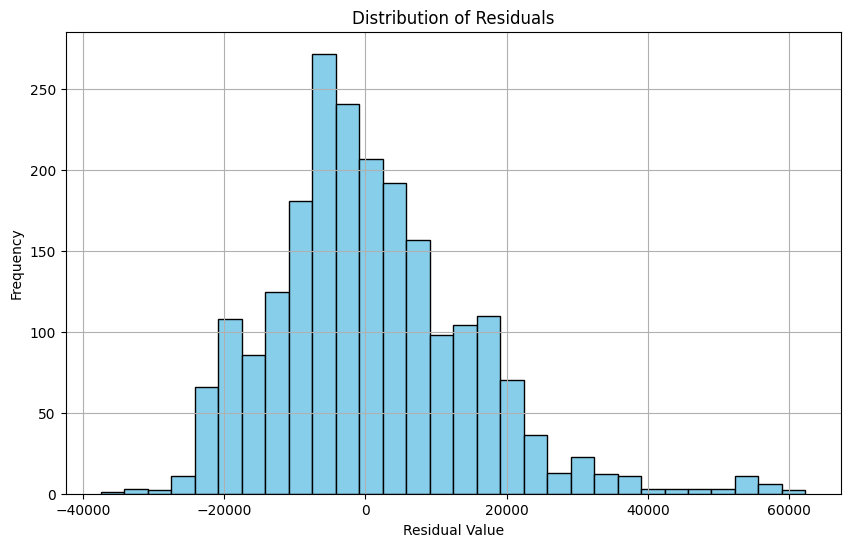

In [ ]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Directional Accuracy (MDA): {mda_value}")

# Step 4: Visualize Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

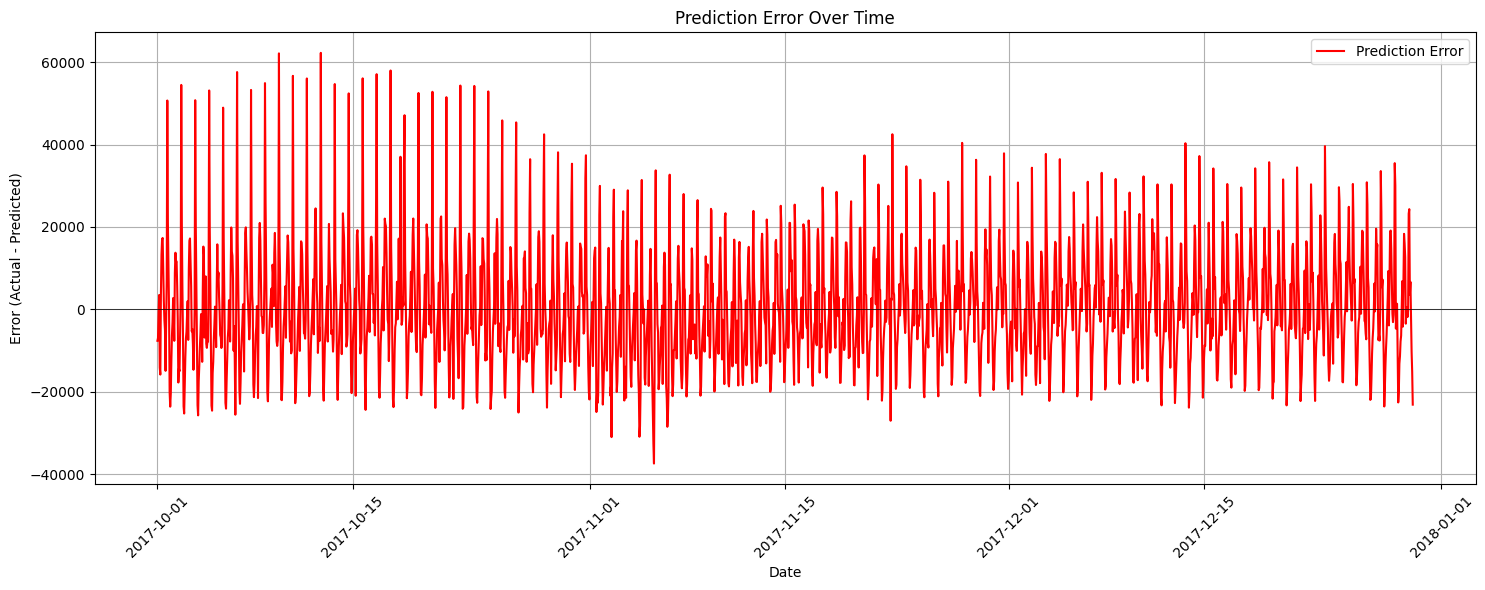

In [ ]:
# Creating a DataFrame for plotting, with the test set dates and the corresponding differences
plot_data = pd.DataFrame({'Date': test_data.index, 'Error': residuals})

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(plot_data['Date'], plot_data['Error'], label='Prediction Error', color='red', linestyle='-')
plt.title('Prediction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Error (Actual - Predicted)')
plt.axhline(0, color='black', lw=0.5)  # Line to denote zero error
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()

# Show plot
plt.show()


## Task 4: Enhancing the Dataset with Temporal Features

To improve the model's ability to predict future power consumption, I enriched our dataset with new features derived from the existing data. These features aim to capture the temporal dependencies and patterns within the time series more effectively.


1. **Lag Features**: Introduce lagged features to the dataset, which represent the power consumption values from the previous hours. This step involves creating new columns in the dataset, each corresponding to the power consumption value shifted by a certain number of hours. Add lags for the last 24 hours (so 24 new features)

2. **Window Features**: Calculate rolling window statistics, such as the mean and standard deviation of power consumption over a specified window size. These features help capture short-term trends and variability in the data. Add mean and std for windows of 6, 12, and 24 hours (6 new features)

3. **Past Value Feature**: Add a feature representing the power consumption value from a specific number of days ago, providing a longer-term context to the model. Add value from 7 days ago (1 feature)

4. **Build and evaluate model**: Using same type of the model as before preprae dataset, build model, and evaluate.

By adding these temporal features, I created a more informative dataset that leverages the inherent time-based patterns in power consumption for better forecasting accuracy. Removed any rows with missing values after adding these new features to maintain dataset integrity.

In [ ]:
# Lag Features: Introduce lagged features for the last 24 hours
for lag in range(1, 25):
    resampled_data[f'PowerConsumption_lag_{lag}'] = resampled_data['PowerConsumption'].shift(lag)

# Window Features: Calculate rolling window statistics (mean and std) for windows of 6, 12, and 24 hours
for window in [6, 12, 24]:
    resampled_data[f'PowerConsumption_mean_{window}h'] = resampled_data['PowerConsumption'].rolling(window=window).mean()
    resampled_data[f'PowerConsumption_std_{window}h'] = resampled_data['PowerConsumption'].rolling(window=window).std()

# Past Value Feature: Add a feature representing the power consumption value from 7 days ago
resampled_data['PowerConsumption_7d_ago'] = resampled_data['PowerConsumption'].shift(24*7)

# Remove any rows with missing values after adding these new features
resampled_data_clean = resampled_data.dropna()

In [ ]:
resampled_data_clean

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,FuturePowerConsumption,PowerConsumption_lag_1,PowerConsumption_lag_2,PowerConsumption_lag_3,...,PowerConsumption_lag_22,PowerConsumption_lag_23,PowerConsumption_lag_24,PowerConsumption_mean_6h,PowerConsumption_std_6h,PowerConsumption_mean_12h,PowerConsumption_std_12h,PowerConsumption_mean_24h,PowerConsumption_std_24h,PowerConsumption_7d_ago
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-08 00:00:00,14.273333,77.916667,0.088000,0.044667,0.123667,159803.54431,141843.03797,189156.45570,216151.89873,235364.05064,...,135530.12658,143769.11392,163163.54431,214908.354430,34264.229786,210359.999998,28748.338639,183536.202530,39495.981182,175187.84810
2017-01-08 01:00:00,14.441667,76.616667,0.091000,0.046500,0.137000,141843.03797,130906.32912,159803.54431,189156.45570,216151.89873,...,131094.68355,135530.12658,143769.11392,197702.278482,41284.708413,205436.962024,34909.951708,183455.949365,39582.161243,147943.29114
2017-01-08 02:00:00,14.216667,74.183333,0.088500,0.045833,0.123667,130906.32912,124988.35444,141843.03797,159803.54431,189156.45570,...,129016.70886,131094.68355,135530.12658,178870.886078,41766.896631,200131.645569,41015.210645,183263.291138,39836.011415,132498.22784
2017-01-08 03:00:00,13.990000,73.150000,0.086500,0.047000,0.164333,124988.35444,124131.64557,130906.32912,141843.03797,159803.54431,...,132802.02532,129016.70886,131094.68355,160474.936712,35787.573614,194813.670887,46400.971860,183008.860758,40201.519828,124866.83544
2017-01-08 04:00:00,13.505000,76.133333,0.092000,0.055000,0.135500,124131.64557,126027.34177,124988.35444,130906.32912,141843.03797,...,142268.35443,132802.02532,129016.70886,145138.227852,25351.035503,189851.645570,50686.192852,182805.316455,40498.046219,122855.69620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 18:00:00,10.771667,58.323333,0.076500,3.185833,3.251500,227577.18632,225082.88974,203875.28517,171279.08746,172629.65780,...,228879.08746,230290.49429,235181.74905,189402.281372,22088.219328,173567.553866,28635.002184,169661.850444,36522.818129,235942.20532
2017-12-30 19:00:00,9.453333,62.406667,0.074667,0.052000,0.102000,225082.88974,222053.23193,227577.18632,203875.28517,171279.08746,...,219473.76425,228879.08746,230290.49429,196556.653993,25895.727746,182138.403042,27230.741240,169444.866921,36160.633646,235358.17491
2017-12-30 20:00:00,9.041667,63.990000,0.080333,0.052667,0.105000,222053.23193,212149.04943,225082.88974,227577.18632,203875.28517,...,202232.69962,219473.76425,228879.08746,203749.556403,26002.641584,189804.816223,23992.431828,169160.456274,35696.714587,229408.36502


In [ ]:
test_start_date = "2017-10-01"
test_end_date = "2017-12-30"

# Split the data into training and test sets based on the specified date
train_data_clean = resampled_data_clean[:test_start_date]
test_data_clean = resampled_data_clean[test_start_date:test_end_date]

# Separate features and target for the training and test sets
X_train_clean = train_data_clean.drop(['FuturePowerConsumption'], axis=1)
y_train_clean = train_data_clean['FuturePowerConsumption']
X_test_clean = test_data_clean.drop(['FuturePowerConsumption'], axis=1)
y_test_clean = test_data_clean['FuturePowerConsumption']

# Build and evaluate the model
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test_clean)

# Calculate Metrics
mae_clean = mean_absolute_error(y_test_clean, y_pred_clean)
mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
mda_value_clean = mda(y_test_clean.values, y_pred_clean)

(mae_clean, mse_clean, mda_value_clean)

(2843.289483939865, 16666059.491554648, 0.8881759853345554)

# Task 5: Incorporating Calendar Features and Holidays

To further enhance our dataset and improve the model's predictive performance, I integrated calendar-based features and information about public holidays. This approach recognizes the impact of weekly cycles and holidays on power consumption patterns.


1. **Day of the Week and Hour of the Day**: Add features that capture the day of the week and the hour of the day, as power consumption patterns can significantly vary across different days and times.

2. **Public Holidays**: Incorporated a binary feature indicating whether a given day is a public holiday in Morocco (using `holidays.CountryHoliday('MA')). This involves creating a list of Moroccan holidays and mapping this information onto the dataset, acknowledging that holidays can influence normal consumption patterns.

3. **Feature Engineering for Holidays**: Converted the holiday information into a binary feature, where `1` indicates a holiday and `0` indicates a non-holiday. This step simplifies the model's use of holiday information.

By integrating these calendar-based features and holiday information, the dataset now provides a comprehensive temporal context, enabling more accurate predictions of power consumption by accounting for regular weekly patterns and special holiday effects.






In [ ]:
import holidays


In [ ]:
import pandas as pd
import holidays

# Ensure 'resampled_data_clean' is your DataFrame and it has a DateTimeIndex

# Use .loc to avoid SettingWithCopyWarning when adding new columns
resampled_data_clean.loc[:, 'DayOfWeek'] = resampled_data_clean.index.dayofweek  # Monday=0, Sunday=6
resampled_data_clean.loc[:, 'HourOfDay'] = resampled_data_clean.index.hour

# Generate a list of public holidays in Canada
canada_holidays = holidays.CountryHoliday('CA', years=resampled_data_clean.index.year.unique())

# Use .loc to avoid SettingWithCopyWarning when adding the 'IsHoliday' column
resampled_data_clean.loc[:, 'IsHoliday'] = resampled_data_clean.index.normalize().isin(
    [pd.Timestamp(holiday).normalize() for holiday in canada_holidays]
).astype(int)


<ipython-input-19-10e6a3c52ff9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resampled_data_clean.loc[:, 'DayOfWeek'] = resampled_data_clean.index.dayofweek  # Monday=0, Sunday=6
<ipython-input-19-10e6a3c52ff9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resampled_data_clean.loc[:, 'HourOfDay'] = resampled_data_clean.index.hour
<ipython-input-19-10e6a3c52ff9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [ ]:
resampled_data_clean

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,FuturePowerConsumption,PowerConsumption_lag_1,PowerConsumption_lag_2,PowerConsumption_lag_3,...,PowerConsumption_mean_6h,PowerConsumption_std_6h,PowerConsumption_mean_12h,PowerConsumption_std_12h,PowerConsumption_mean_24h,PowerConsumption_std_24h,PowerConsumption_7d_ago,DayOfWeek,HourOfDay,IsHoliday
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-08 00:00:00,14.273333,77.916667,0.088000,0.044667,0.123667,159803.54431,141843.03797,189156.45570,216151.89873,235364.05064,...,214908.354430,34264.229786,210359.999998,28748.338639,183536.202530,39495.981182,175187.84810,6,0,0
2017-01-08 01:00:00,14.441667,76.616667,0.091000,0.046500,0.137000,141843.03797,130906.32912,159803.54431,189156.45570,216151.89873,...,197702.278482,41284.708413,205436.962024,34909.951708,183455.949365,39582.161243,147943.29114,6,1,0
2017-01-08 02:00:00,14.216667,74.183333,0.088500,0.045833,0.123667,130906.32912,124988.35444,141843.03797,159803.54431,189156.45570,...,178870.886078,41766.896631,200131.645569,41015.210645,183263.291138,39836.011415,132498.22784,6,2,0
2017-01-08 03:00:00,13.990000,73.150000,0.086500,0.047000,0.164333,124988.35444,124131.64557,130906.32912,141843.03797,159803.54431,...,160474.936712,35787.573614,194813.670887,46400.971860,183008.860758,40201.519828,124866.83544,6,3,0
2017-01-08 04:00:00,13.505000,76.133333,0.092000,0.055000,0.135500,124131.64557,126027.34177,124988.35444,130906.32912,141843.03797,...,145138.227852,25351.035503,189851.645570,50686.192852,182805.316455,40498.046219,122855.69620,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 18:00:00,10.771667,58.323333,0.076500,3.185833,3.251500,227577.18632,225082.88974,203875.28517,171279.08746,172629.65780,...,189402.281372,22088.219328,173567.553866,28635.002184,169661.850444,36522.818129,235942.20532,5,18,0
2017-12-30 19:00:00,9.453333,62.406667,0.074667,0.052000,0.102000,225082.88974,222053.23193,227577.18632,203875.28517,171279.08746,...,196556.653993,25895.727746,182138.403042,27230.741240,169444.866921,36160.633646,235358.17491,5,19,0
2017-12-30 20:00:00,9.041667,63.990000,0.080333,0.052667,0.105000,222053.23193,212149.04943,225082.88974,227577.18632,203875.28517,...,203749.556403,26002.641584,189804.816223,23992.431828,169160.456274,35696.714587,229408.36502,5,20,0


In [ ]:
test_start_date = "2017-10-01"
test_end_date = "2017-12-30"

# Split the data into training and test sets based on the specified date
train_data_clean = resampled_data_clean[:test_start_date]
test_data_clean = resampled_data_clean[test_start_date:test_end_date]

# Separate features and target for the training and test sets
X_train_clean = train_data_clean.drop(['FuturePowerConsumption'], axis=1)
y_train_clean = train_data_clean['FuturePowerConsumption']
X_test_clean = test_data_clean.drop(['FuturePowerConsumption'], axis=1)
y_test_clean = test_data_clean['FuturePowerConsumption']

# Build and evaluate the model
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test_clean)

# Calculate Metrics
mae_clean = mean_absolute_error(y_test_clean, y_pred_clean)
mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
mda_value_clean = mda(y_test_clean.values, y_pred_clean)

(mae_clean, mse_clean, mda_value_clean)

(2847.7076104013354, 16461440.854856014, 0.8877176901924839)